## MSCA 31009 Machine Learning & Predictive Analytics
## Assignment 3
## Duo Zhou

#### Random Forest Binary Classification: 

For assignment #4 we will be working with a credit default data set. The data includes various features around financial history and demographic information. The target variable is "default payment next week", which is just a binary flag of whether a customer defaults on a payment in the next week.

You will need to use the Random Forest Classifier from sklearn in order to build a classifier to predict if a customer is likely to default. You will also need to use the GridSearch CV for this assignment.

In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Data Processing:

a) Import the data: shape should be (30000,24)

In [35]:
df = pd.read_excel('data/default of credit card clients.xls',index_col=0)
df.shape

(30000, 24)

b) Remove any rows that have missing data.

In [36]:
df.dropna(how='any', axis = 0, inplace=True)
df.shape

(30000, 24)

c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 

In [37]:
X = df.drop(columns='default payment next month')
y = df['default payment next month']
print(X.shape,y.shape)

(30000, 23) (30000,)


d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21000, 23) (9000, 23) (21000,) (9000,)


#### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state (check documentation to confirm how to do this). 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as skm

In [41]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

C:\Users\zd000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [42]:
y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [43]:
print("Test Score:", clf.score(X_test, y_test))
print("\nTest Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report")
print(skm.classification_report(y_test, y_test_pred))
print("\nTest ROC AUC")
# limit to probability for class = 1 
print(skm.roc_auc_score(y_test, y_test_proba[:,1]))

Test Score: 0.8045555555555556

Test Confusion Matrix
[[6600  437]
 [1322  641]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7037
           1       0.59      0.33      0.42      1963

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000


Test ROC AUC
0.7253645330471041


e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [44]:
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)

In [45]:
print("Train Score:", clf.score(X_train, y_train))
print("\nTrain Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred))
print("\nTrain Classification Report")
print(skm.classification_report(y_train, y_train_pred))
print("\nTrain ROC AUC")
# limit to probability for class = 1 
print(skm.roc_auc_score(y_train, y_train_proba[:,1]))

Train Score: 0.9799523809523809

Train Confusion Matrix
[[16294    33]
 [  388  4285]]

Train Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16327
           1       0.99      0.92      0.95      4673

    accuracy                           0.98     21000
   macro avg       0.98      0.96      0.97     21000
weighted avg       0.98      0.98      0.98     21000


Train ROC AUC
0.9990750441133462


Based on the result above, we can see that for default prediction(y=1) training f1_score is 0.95 and test f1-score is 0.42. The overall accuracy is 0.98 for training set and 0.8 for test set. The training ROC AUC score is 0.9991 and test ROC AUC score is 0.7254. All three scores are very close to 1 in the training set, but drop drastically in the test set. This is a clear sign of overfitting since the model performance droped a lot when applied to new unseen data.

#### 3. Random Forest Classifier - Grid Search:<br>
<br>
Start by creating a simple Random Forest only using default parameters.<br>
<br>
a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: <br>
<br>
n_estimators: 50, 100, 500<br>
max_features: 2, 4, sqrt<br>
max_depth: 6, 8, 10, 12<br>
Note: Feel free to try out more parameters, the above is the bare minimum for this assignment. The goal of the above parameters are to try a large but fairly fast grid search. This took about 8 minutes to run on your TAs computer but that time will vary greatly based on computational resources. <br>
<br>
Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters). 

In [47]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {
    'n_estimators': [50, 100, 500,2000],
    'max_features': [2, 4, 'sqrt'],
    'max_depth': [6, 8, 10, 12]
}

clf1 = RandomForestClassifier()

grid_search = GridSearchCV(clf1, parameters, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 13.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

b) Identify the best performing model:

In [68]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 2, 'n_estimators': 500}

In [69]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

--------------------------------------------
c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

e) Calculate the roc_auc_score for this model.

f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [70]:
bm = grid_search.best_estimator_

y_train_pred1 = bm.predict(X_train)
y_test_pred1 = bm.predict(X_test)

y_train_proba1 = bm.predict_proba(X_train)
y_test_proba1 = bm.predict_proba(X_test)

In [71]:
print("Train Score:", bm.score(X_train, y_train))
print("\nTrain Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_pred1))
print("\nTrain Classification Report")
print(skm.classification_report(y_train, y_train_pred1))
print("\nTrain ROC AUC:", round(skm.roc_auc_score(y_train, y_train_proba1[:,1]), 2))
print("-----------------------------------------------------------")

print("Test Score:", bm.score(X_test, y_test))
print("\nTest Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_pred1))
print("\nTest Classification Report")
print(skm.classification_report(y_test, y_test_pred1))
print("\nTest ROC AUC:", round(skm.roc_auc_score(y_test, y_test_proba1[:,1]), 2))

Train Score: 0.8774285714285714

Train Confusion Matrix
[[16167   160]
 [ 2414  2259]]

Train Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     16327
           1       0.93      0.48      0.64      4673

    accuracy                           0.88     21000
   macro avg       0.90      0.74      0.78     21000
weighted avg       0.88      0.88      0.86     21000


Train ROC AUC: 0.91
-----------------------------------------------------------
Test Score: 0.8174444444444444

Test Confusion Matrix
[[6713  324]
 [1319  644]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7037
           1       0.67      0.33      0.44      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000


Test ROC AUC: 0.78


##### Are there signs of overfitting? Why or why not?
Comapre to base model in Question 2, all three scores we discussed in Question 2, default prediction(y=1) f1_score, over all accuracy and  ROC AUC score, are lower when applying our best Q3 model to training data set. However, all three scores increased when applying Q3 best model to the test data set. The difference between train and test scores are much smaller when applying Q3 best model. This clearly indicates that Q3 best model overfit less than Q2 base model. If we deploy Q3 best model, it will perform much better than Q2 base model when applied to new unseen data. Since all three scores are reasonably close between train and test in Q3 model, we can say that overfitting is not that significant.

#### 4. Create a feature importance plot for your best performing model.

a) What are the top 5 features for this model?

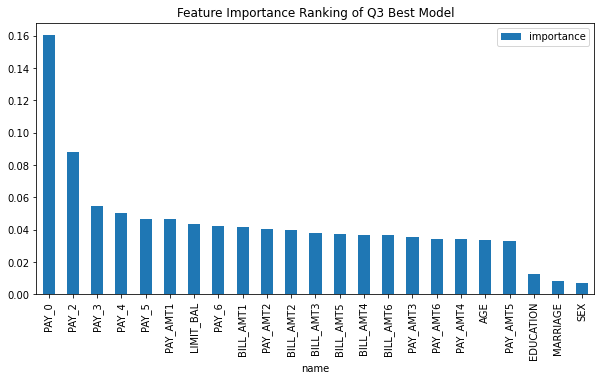

In [80]:
fi = pd.DataFrame({'name': X.columns, 'importance': bm.feature_importances_})
fi.sort_values('importance', ascending=False, inplace=True)
fi.plot.bar(x='name', y='importance',title='Feature Importance Ranking of Q3 Best Model',figsize=(10,5))

Based on the graph above, top 5 features for this model are PAY_0, PAY_2, PAY_3, PAY_4, PAY_5.

#### 5. Conceptual Questions:

##### a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why <br>
<br>
The best parameters from the Grid Search in Question #3 are 'max_depth': 12, 'max_features': 2, 'n_estimators': 500.<br>

Model #3 performed better when applied to test data and Model #2 performed better when applied to training data. Since Model #3 performs better when applied to new unseen data, we can say that Model #3 outperformed Model #2. Please see my discussion on overfitting in Q2 and Q3. <br>
<br>

##### b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case.  <br>

Comapre to base model in Question 2, all three scores we discussed in Question 2, default prediction(y=1) f1_score, over all accuracy and ROC AUC score, are lower when applying our best Q3 model to training data set. However, all three scores increased when applying Q3 best model to the test data set. The difference between train and test scores are much smaller when applying Q3 best model. This clearly indicates that Q3 best model overfit less than Q2 base model. <br>
<br>

##### c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure. <br>

The Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.<br>

While splitting a node, the features possessing the least value of the Gini Index would get chosen.<br>


$G = \sum_{k=1}^{k} p_{mk}(1-p_{mk})$ <br>

where $p_{mk}$ is the proportion of training observations in the mth region that are from the kth class.

The purer(smaller Gini Index) each terminal node gets, the better final model perfoms.

##### d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

The bagging algorithm draws random bootstrap samples from your training set and we provide each tree with the full set of features. However, in addition to the bootstrap samples, Random Forest also draws random subsets of features for training the individual trees. Due to the random feature selection, the trees are more independent of each other compared to regular bagging, which often results in better predictive performance (due to better variance-bias trade-offs), and I’d say that it’s also faster than bagging, because each tree learns only from a subset of features.

##### e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

max_depth is the how many splits deep you want each tree to go. max_depth = 10, for example, would limit trees to at most 10 splits down any given branch. Samller max_depth has the consequence that our Random Forest can no longer fit the training data as closely, and is therefore more stable and can prevent overfitting. It also creates lower variance, giving our model higher bias. However severely constraining max_depth could increase the bias of each tree given that they may not be able to capture certain patterns in the data before hitting their max_depth limit. 

##### f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?
1)<br>
Split the entire data randomly into K folds. The higher value of K leads to less biased model (but large variance might lead to over-fit), where as the lower value of K(k=1) is similar to the train-test split. Then validate the model using each of the K folds while train the model using the remaining folds. Records the scores/errors. Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model.<br>

2)<br>

K-Folds technique generally results in a less biased model compare to single train-test split. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. It is especially useful when we have a limited input data. In addition, when we tune our model, train-test split may encounter a situation where extreme outliers are all grouped into either train or test, which will cause high bias in our training model parameters or test performance. In summary, Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits and model&test across all data points. This will capture more information from the entire data set and gives you a better indication of how well your model will perform on different unseen data. 